In [9]:
import pandas as pd
import numpy as np
df =pd.read_csv("/content/Dataset-SA.csv")
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [10]:
pip install pandas nltk

In [11]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**STEP 2 - PRE PROCESSING - TO REMOVE STOP WORDS**

In [15]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk  # Import nltk library

# Download the 'punkt' resource
nltk.download('punkt_tab')

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/Dataset-SA.csv')

# Define a function to tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    if pd.isnull(text):  # Check for NaN values
        return []

    # Tokenize the text, remove punctuation, and lowercase the tokens
    tokens = [word.lower() for word in word_tokenize(text) if word.isalpha() and word not in string.punctuation]

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Specify the columns to process
text_columns = ['product_name', 'Review', 'Summary']

# Apply the function to the specified columns using apply and lambda
for column in text_columns:
    df[column] = df[column].apply(lambda x: tokenize_and_remove_stopwords(x))

# Save the new DataFrame back to a CSV file
df.to_csv('output_file.csv', index=False)
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,product_name,product_price,Rate,Review,Summary,Sentiment
0,"[candes, l, air, cooler, white, black, elegant...",3999,5,[super],"[great, cooler, excellent, air, flow, price, a...",positive
1,"[candes, l, air, cooler, white, black, elegant...",3999,5,[awesome],"[best, budget, fit, cooler, nice, cooling]",positive
2,"[candes, l, air, cooler, white, black, elegant...",3999,3,[fair],"[quality, good, power, air, decent]",positive
3,"[candes, l, air, cooler, white, black, elegant...",3999,1,"[useless, product]","[bad, product, fan]",negative
4,"[candes, l, air, cooler, white, black, elegant...",3999,3,[fair],"[ok, ok, product]",neutral
...,...,...,...,...,...,...
205047,"[cello, pack, opalware, cello, dazzle, lush, f...",1299,5,"[must, buy]","[good, product]",positive
205048,"[cello, pack, opalware, cello, dazzle, lush, f...",1299,5,[super],[nice],positive
205049,"[cello, pack, opalware, cello, dazzle, lush, f...",1299,3,[nice],"[nice, fast, delivery]",positive
205050,"[cello, pack, opalware, cello, dazzle, lush, f...",1299,5,[wow],"[awesome, product]",positive


In [17]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

# Download the necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/Dataset-SA.csv')

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to tokenize, remove stopwords, and lemmatize
def process_text(text):
    if pd.isnull(text):
        return ''

    # Tokenize the text, remove punctuation, and lowercase the tokens
    tokens = [word.lower() for word in word_tokenize(text) if word.isalpha() and word not in string.punctuation]

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(lemmatized_tokens)

# Specify the columns to process
text_columns = ['product_name', 'Review', 'Summary']

# Apply the function to the specified columns using apply and lambda
for column in text_columns:
    df[column] = df[column].apply(lambda x: process_text(x))

# Save the new DataFrame back to a CSV file
df.to_csv('output_file.csv', index=False)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,product_name,product_price,Rate,Review,Summary,Sentiment
0,candes l air cooler white black elegant high c...,3999,5,super,great cooler excellent air flow price amazing ...,positive
1,candes l air cooler white black elegant high c...,3999,5,awesome,best budget fit cooler nice cooling,positive
2,candes l air cooler white black elegant high c...,3999,3,fair,quality good power air decent,positive
3,candes l air cooler white black elegant high c...,3999,1,useless product,bad product fan,negative
4,candes l air cooler white black elegant high c...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello pack opalware cello dazzle lush fiesta o...,1299,5,must buy,good product,positive
205048,cello pack opalware cello dazzle lush fiesta o...,1299,5,super,nice,positive
205049,cello pack opalware cello dazzle lush fiesta o...,1299,3,nice,nice fast delivery,positive
205050,cello pack opalware cello dazzle lush fiesta o...,1299,5,wow,awesome product,positive


**STEP 3 - MISSING DATA**

In [18]:
df.isnull()
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,0
Summary,0
Sentiment,0


In [53]:
df.isnull()
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,0
Summary,0
Sentiment,0


In [20]:
df.head()
df.tail()

,product_name,product_price,Rate,Review,Summary,Sentiment
205047,cello pack opalware cello dazzle lush fiesta o...,1299,5,must buy,good product,positive
205048,cello pack opalware cello dazzle lush fiesta o...,1299,5,super,nice,positive
205049,cello pack opalware cello dazzle lush fiesta o...,1299,3,nice,nice fast delivery,positive
205050,cello pack opalware cello dazzle lush fiesta o...,1299,5,wow,awesome product,positive
205051,cello pack opalware cello dazzle lush fiesta o...,1299,4,,good mixing bowl included one disappointmentan...,neutral


In [21]:
df.dropna()
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,candes l air cooler white black elegant high c...,3999,5,super,great cooler excellent air flow price amazing ...,positive
1,candes l air cooler white black elegant high c...,3999,5,awesome,best budget fit cooler nice cooling,positive
2,candes l air cooler white black elegant high c...,3999,3,fair,quality good power air decent,positive
3,candes l air cooler white black elegant high c...,3999,1,useless product,bad product fan,negative
4,candes l air cooler white black elegant high c...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello pack opalware cello dazzle lush fiesta o...,1299,5,must buy,good product,positive
205048,cello pack opalware cello dazzle lush fiesta o...,1299,5,super,nice,positive
205049,cello pack opalware cello dazzle lush fiesta o...,1299,3,nice,nice fast delivery,positive
205050,cello pack opalware cello dazzle lush fiesta o...,1299,5,wow,awesome product,positive


In [22]:
mode_value=df.mode()
df=df.fillna(mode_value)
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,candes l air cooler white black elegant high c...,3999,5,super,great cooler excellent air flow price amazing ...,positive
1,candes l air cooler white black elegant high c...,3999,5,awesome,best budget fit cooler nice cooling,positive
2,candes l air cooler white black elegant high c...,3999,3,fair,quality good power air decent,positive
3,candes l air cooler white black elegant high c...,3999,1,useless product,bad product fan,negative
4,candes l air cooler white black elegant high c...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello pack opalware cello dazzle lush fiesta o...,1299,5,must buy,good product,positive
205048,cello pack opalware cello dazzle lush fiesta o...,1299,5,super,nice,positive
205049,cello pack opalware cello dazzle lush fiesta o...,1299,3,nice,nice fast delivery,positive
205050,cello pack opalware cello dazzle lush fiesta o...,1299,5,wow,awesome product,positive


**STEP 3 - TF-IDF VALUES**

In [23]:
#!pip install sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(df['Summary'])
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 916166 stored elements and shape (205052, 39843)>

In [24]:
print(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 916166 stored elements and shape (205052, 39843)>
  Coords	Values
  (0, 14750)	0.24070728984592438
  (0, 7314)	0.34665230940199177
  (0, 11052)	0.2225611875407221
  (0, 539)	0.32229211019764414
  (0, 12945)	0.4118814637585889
  (0, 26445)	0.20286904401992453
  (0, 862)	0.2458603685969241
  (0, 36710)	0.5777942776165811
  (0, 19729)	0.2517752037106731
  (1, 7314)	0.4956783156239256
  (1, 3270)	0.27974797555227804
  (1, 4448)	0.43620827983926236
  (1, 12509)	0.4517403645073307
  (1, 22433)	0.18439214495958509
  (1, 7342)	0.497691263883835
  (2, 539)	0.5475255600063288
  (2, 28293)	0.26316429310383366
  (2, 14104)	0.16574514808127994
  (2, 26141)	0.5247650848798445
  (2, 8374)	0.5728092767697462
  (3, 2419)	0.5246058704794837
  (3, 26938)	0.2736964894568777
  (3, 11813)	0.8061506759393336
  (4, 26938)	0.22625556561275526
  (4, 23249)	0.9740679745424609
  :	:
  (205043, 2348)	0.8275674673253534
  (205044, 34150)	1.0
  (205045, 2

In [25]:
df['Sentiment'].nunique()

3

In [26]:
df.dtypes

,0
product_name,object
product_price,object
Rate,object
Review,object
Summary,object
Sentiment,object


In [27]:
df['Sentiment']=df['Sentiment'].astype('category')
df.dtypes

,0
product_name,object
product_price,object
Rate,object
Review,object
Summary,object
Sentiment,category


In [28]:
df['Sentiment']=df['Sentiment'].cat.codes

In [29]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,candes l air cooler white black elegant high c...,3999,5,super,great cooler excellent air flow price amazing ...,2
1,candes l air cooler white black elegant high c...,3999,5,awesome,best budget fit cooler nice cooling,2
2,candes l air cooler white black elegant high c...,3999,3,fair,quality good power air decent,2
3,candes l air cooler white black elegant high c...,3999,1,useless product,bad product fan,0
4,candes l air cooler white black elegant high c...,3999,3,fair,ok ok product,1


In [56]:
# Convert 'product_price' and 'Rate' to numeric, coercing errors to NaN
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

# Calculate the correlation matrix
cor1 = df.corr(numeric_only=True)
display(cor1)

,product_price,Rate,Sentiment
product_price,1.000000,0.063906,0.036858
Rate,0.063906,1.000000,0.803237
Sentiment,0.036858,0.803237,1.000000


<Axes: xlabel='Rate', ylabel='Sentiment'>

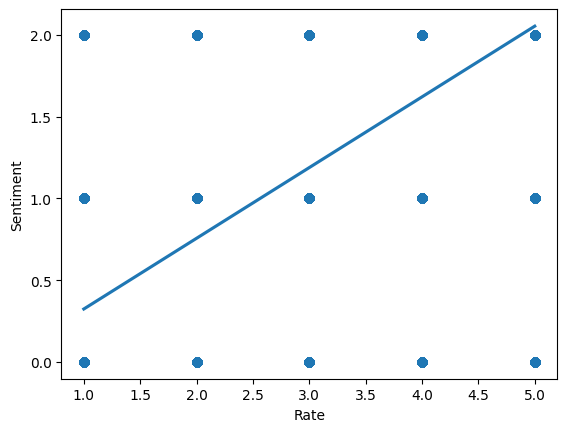

In [57]:
import seaborn as sns
sns.regplot(x='Rate',y='Sentiment',data=df)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
import sklearn
from sklearn.model_selection import train_test_split

In [58]:
'''
from sklearn.naive_bayes import MultinomialNB
classifier = DecisionTreeClassifier
y=df['Sentiment']
x=tfidf_matrix
classifier1 =  MultinomialNB()
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)
x_train = x_train.toarray()
'''

"\nfrom sklearn.naive_bayes import MultinomialNB\nclassifier = DecisionTreeClassifier\ny=df['Sentiment']\nx=tfidf_matrix\nclassifier1 =  MultinomialNB()\nx_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.2,random_state=42)\n\nprint(x_test.shape)\nprint(x_train.shape)\nprint(y_test.shape)\nprint(y_train.shape)\nx_train = x_train.toarray()\n"

In [59]:
#classifier1.fit(x_train,y_train)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.naive_bayes import MultinomialNB

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [36]:
 x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, df['Sentiment'], test_size=0.2, random_state=42)

In [37]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [38]:
epochs = 150
for epoch in range(epochs):
    classifier.partial_fit(x_train, y_train, classes=np.unique(y_train))

In [39]:
y_pred = classifier.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8958815927434103


In [41]:
from xgboost import XGBClassifier
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, df['Sentiment'], test_size=0.2, random_state=42)

In [42]:
classifier1 = XGBClassifier()
classifier1.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [43]:
y_pred = classifier1.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1)

Accuracy: 0.9126331959718125


In [44]:
sentence = "This product is amazing! I love it!"
sentence_tokens = tokenize_and_remove_stopwords(sentence)
sentence_tfidf = tfidf.transform([' '.join(sentence_tokens)])
predicted_sentiment = classifier.predict(sentence_tfidf)[0]
print("Predicted sentiment:", predicted_sentiment)


Predicted sentiment: 2


In [51]:
sentence = input('enter comment')
sentence_tfidf = tfidf.transform([sentence])
prediction = classifier1.predict(sentence_tfidf)[0]
print(prediction)
if prediction == 0:
  print('NEGATIVE')
elif (prediction == 1):
  print('NEUTRAL')
else:
  print('POSITIVE')

enter commentaverage
1
NEUTRAL
